# Minería de Datos
## Agrupación y Clasificación de artículos investigativos por sus abstract

Presentado por: Jairo Castrellón - Estudiante de la maestria en estadística

## 1)  Preprocesamiento de datos

Se cargan las librerias y paquetes necesarios para el trabajo:

In [1]:
import json
import csv
from pandas.io.json import json_normalize
import string
import seaborn as sns
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
import pandas as pd
import numpy as np
import re
import nltk
import matplotlib.pyplot as plt

pd.options.display.max_colwidth = 200
%matplotlib inline

In [9]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\Jairo
[nltk_data]     Castrellón\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to C:\Users\Jairo
[nltk_data]     Castrellón\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

Se cargan los datos con los que se trabajarán en este proyecto, obtenidos y disponibles en https://www.kaggle.com/neelshah18/arxivdataset

In [3]:
with open('arxivData.json') as file:
  data2=json.load(file)

In [4]:
df2=pd.DataFrame.from_dict(json_normalize(data2))
df2.head(5)

,author,day,id,link,month,summary,tag,title,year
0,"[{'name': 'Ahmed Osman'}, {'name': 'Wojciech Samek'}]",1,1802.00209v1,"[{'rel': 'alternate', 'href': 'http://arxiv.org/abs/1802.00209v1', 'type': 'text/html'}, {'rel': 'related', 'href': 'http://arxiv.org/pdf/1802.00209v1', 'type': 'application/pdf', 'title': 'pdf'}]",2,We propose an architecture for VQA which utilizes recurrent layers to\ngenerate visual and textual attention. The memory characteristic of the\nproposed recurrent attention units offers a rich joi...,"[{'term': 'cs.AI', 'scheme': 'http://arxiv.org/schemas/atom', 'label': None}, {'term': 'cs.CL', 'scheme': 'http://arxiv.org/schemas/atom', 'label': None}, {'term': 'cs.CV', 'scheme': 'http://arxiv...",Dual Recurrent Attention Units for Visual Question Answering,2018
1,"[{'name': 'Ji Young Lee'}, {'name': 'Franck Dernoncourt'}]",12,1603.03827v1,"[{'rel': 'alternate', 'href': 'http://arxiv.org/abs/1603.03827v1', 'type': 'text/html'}, {'rel': 'related', 'href': 'http://arxiv.org/pdf/1603.03827v1', 'type': 'application/pdf', 'title': 'pdf'}]",3,"Recent approaches based on artificial neural networks (ANNs) have shown\npromising results for short-text classification. However, many short texts\noccur in sequences (e.g., sentences in a docume...","[{'term': 'cs.CL', 'scheme': 'http://arxiv.org/schemas/atom', 'label': None}, {'term': 'cs.AI', 'scheme': 'http://arxiv.org/schemas/atom', 'label': None}, {'term': 'cs.LG', 'scheme': 'http://arxiv...",Sequential Short-Text Classification with Recurrent and Convolutional\n Neural Networks,2016
2,"[{'name': 'Iulian Vlad Serban'}, {'name': 'Tim Klinger'}, {'name': 'Gerald Tesauro'}, {'name': 'Kartik Talamadupula'}, {'name': 'Bowen Zhou'}, {'name': 'Yoshua Bengio'}, {'name': 'Aaron Courville'}]",2,1606.00776v2,"[{'rel': 'alternate', 'href': 'http://arxiv.org/abs/1606.00776v2', 'type': 'text/html'}, {'rel': 'related', 'href': 'http://arxiv.org/pdf/1606.00776v2', 'type': 'application/pdf', 'title': 'pdf'}]",6,"We introduce the multiresolution recurrent neural network, which extends the\nsequence-to-sequence framework to model natural language generation as two\nparallel discrete stochastic processes: a ...","[{'term': 'cs.CL', 'scheme': 'http://arxiv.org/schemas/atom', 'label': None}, {'term': 'cs.AI', 'scheme': 'http://arxiv.org/schemas/atom', 'label': None}, {'term': 'cs.LG', 'scheme': 'http://arxiv...",Multiresolution Recurrent Neural Networks: An Application to Dialogue\n Response Generation,2016
3,"[{'name': 'Sebastian Ruder'}, {'name': 'Joachim Bingel'}, {'name': 'Isabelle Augenstein'}, {'name': 'Anders Søgaard'}]",23,1705.08142v2,"[{'rel': 'alternate', 'href': 'http://arxiv.org/abs/1705.08142v2', 'type': 'text/html'}, {'rel': 'related', 'href': 'http://arxiv.org/pdf/1705.08142v2', 'type': 'application/pdf', 'title': 'pdf'}]",5,"Multi-task learning is motivated by the observation that humans bring to bear\nwhat they know about related problems when solving new ones. Similarly, deep\nneural networks can profit from related...","[{'term': 'stat.ML', 'scheme': 'http://arxiv.org/schemas/atom', 'label': None}, {'term': 'cs.AI', 'scheme': 'http://arxiv.org/schemas/atom', 'label': None}, {'term': 'cs.CL', 'scheme': 'http://arx...",Learning what to share between loosely related tasks,2017
4,"[{'name': 'Iulian V. Serban'}, {'name': 'Chinnadhurai Sankar'}, {'name': 'Mathieu Germain'}, {'name': 'Saizheng Zhang'}, {'name': 'Zhouhan Lin'}, {'name': 'Sandeep Subramanian'}, {'name': 'Taesup ...",7,1709.02349v2,"[{'rel': 'alternate', 'href': 'http://arxiv.org/abs/1709.02349v2', 'type': 'text/html'}, {'rel': 'related', 'href': 'http://arxiv.org/pdf/1709.02349v2', 'type': 'application/pdf', 'title': 'pdf'}]",9,We present MILABOT: a deep reinforcement learning chatbot developed by the\nMontreal Institute for Learning Algorithms (MILA) for the Amazon Alexa Prize\ncompetition. MILABOT is capable of convers...,"[{'term': 'cs.CL', 'scheme': 'http://arxiv.org/schemas/atom', 'label': None}, {'term': 'c

Se eliminan algunas variabes o atributos del conjunto de datos que no serán utilizados en este trabajo:

In [5]:
df2=df2.drop(["link","author","tag","day","month","year"],axis=1)
cols = df2.columns.tolist()
cols = cols[-3:] + cols[:-3]
df2 = df2[cols]
df2.head(5)


,id,summary,title
0,1802.00209v1,We propose an architecture for VQA which utilizes recurrent layers to\ngenerate visual and textual attention. The memory characteristic of the\nproposed recurrent attention units offers a rich joi...,Dual Recurrent Attention Units for Visual Question Answering
1,1603.03827v1,"Recent approaches based on artificial neural networks (ANNs) have shown\npromising results for short-text classification. However, many short texts\noccur in sequences (e.g., sentences in a docume...",Sequential Short-Text Classification with Recurrent and Convolutional\n Neural Networks
2,1606.00776v2,"We introduce the multiresolution recurrent neural network, which extends the\nsequence-to-sequence framework to model natural language generation as two\nparallel discrete stochastic processes: a ...",Multiresolution Recurrent Neural Networks: An Application to Dialogue\n Response Generation
3,1705.08142v2,"Multi-task learning is motivated by the observation that humans bring to bear\nwhat they know about related problems when solving new ones. Similarly, deep\nneural networks can profit from related...",Learning what to share between loosely related tasks
4,1709.02349v2,We present MILABOT: a deep reinforcement learning chatbot developed by the\nMontreal Institute for Learning Algorithms (MILA) for the Amazon Alexa Prize\ncompetition. MILABOT is capable of convers...,A Deep Reinforcement Learning Chatbot


Por ser un dataset tan extenso, y para efectos del cálculo computacional, se va a trabajar con 2000 observaciones, escogidas aleatoriamente del conjunto de datos.

In [6]:
import random
random.seed(30)
cut=np.asarray(df2.sample(2000))
df2=pd.DataFrame(cut,columns=['code', 'summary', 'title'])
df2.head(5)

,code,summary,title
0,1707.01922v2,"The existing methods of domain adaptation (DA) work under the assumption that\nthe task-relevant target-domain training data is given. However, such\nassumption can be violated, which is often ign...",Zero-Shot Deep Domain Adaptation
1,1302.6615v1,Seasonality is a distinctive characteristic which is often observed in many\npractical time series. Artificial Neural Networks (ANNs) are a class of\npromising models for efficiently recognizing a...,PSO based Neural Networks vs. Traditional Statistical Models for\n Seasonal Time Series Forecasting
2,1311.2150v1,We consider the problem of recovering block-sparse signals whose structures\nare unknown \emph{a priori}. Block-sparse signals with nonzero coefficients\noccurring in clusters arise naturally in m...,Pattern-Coupled Sparse Bayesian Learning for Recovery of Block-Sparse\n Signals
3,1312.7422v1,"This volume contains the papers presented at the sixth workshop on Answer Set\nProgramming and Other Computing Paradigms (ASPOCP 2013) held on August 25th,\n2013 in Istanbul, co-located with the 2...","Proceedings of Answer Set Programming and Other Computing Paradigms\n (ASPOCP 2013), 6th International Workshop, August 25, 2013, Istanbul, Turkey"
4,1702.06662v1,Binary Knapsack Problem (BKP) is to select a subset of an element (item) set\nwith the highest value while keeping the total weight within the capacity of\nthe knapsack. This paper presents an int...,An Integer Programming Model for Binary Knapsack Problem with\n Value-Related Dependencies among Elements


Y se trabajará únicamente con los "summary" o "abstract" de los artículos, y se obtienen algunos indicadores importantes de estos:

In [8]:
corpus_df = df2[['summary']]
corpus_df.head(5)

,summary
0,"The existing methods of domain adaptation (DA) work under the assumption that\nthe task-relevant target-domain training data is given. However, such\nassumption can be violated, which is often ign..."
1,Seasonality is a distinctive characteristic which is often observed in many\npractical time series. Artificial Neural Networks (ANNs) are a class of\npromising models for efficiently recognizing a...
2,We consider the problem of recovering block-sparse signals whose structures\nare unknown \emph{a priori}. Block-sparse signals with nonzero coefficients\noccurring in clusters arise naturally in m...
3,"This volume contains the papers presented at the sixth workshop on Answer Set\nProgramming and Other Computing Paradigms (ASPOCP 2013) held on August 25th,\n2013 in Istanbul, co-located with the 2..."
4,Binary Knapsack Problem (BKP) is to select a subset of an element (item) set\nwith the highest value while keeping the total weight within the capacity of\nthe knapsack. This paper presents an int...


In [10]:
##dimensión de los datos
corpus_df.shape

(2000, 1)

In [11]:
## Cantidad de datos faltantes
corpus_df.isnull().mean().sort_values(ascending=False)

summary    0.0
dtype: float64

In [12]:
## tipo de datos
corpus_df.dtypes

summary    object
dtype: object

In [13]:
## descripción de la longitud (por número de palabras) de los abstract

df2['year']=df2['summary'].apply(len)
df2.rename(columns={'year':'abstract_length'},inplace=True)
df2.describe()

,abstract_length
count,2000.000000
mean,1030.371500
std,350.551639
min,88.000000
25%,777.750000
50%,1011.500000
75%,1258.250000
max,3121.000000


Se realiza la eliminación de palabras con alta frecuencia pero baja influencia "stopwords" y a llevar a las palabras a su núcleo para una mejor manejabilidad de estas, por medio de tokens y stemms

In [14]:
def remove_punctuation(text):
  no_punct = "".join([c for c in text if c not in string.punctuation])
  return no_punct

In [15]:
df2['summary'] = df2['summary'].apply(lambda x: remove_punctuation(x))
abstr=df2['summary']
abstr.head(5)

0    The existing methods of domain adaptation DA work under the assumption that\nthe taskrelevant targetdomain training data is given However such\nassumption can be violated which is often ignored by...
1    Seasonality is a distinctive characteristic which is often observed in many\npractical time series Artificial Neural Networks ANNs are a class of\npromising models for efficiently recognizing and ...
2    We consider the problem of recovering blocksparse signals whose structures\nare unknown empha priori Blocksparse signals with nonzero coefficients\noccurring in clusters arise naturally in many pr...
3    This volume contains the papers presented at the sixth workshop on Answer Set\nProgramming and Other Computing Paradigms ASPOCP 2013 held on August 25th\n2013 in Istanbul colocated with the 29th I...
4    Binary Knapsack Problem BKP is to select a subset of an element item set\nwith the highest value while keeping the total weight within the capacity of\nthe knapsack This paper

In [16]:
tokenizer = RegexpTokenizer(r'\w+')

In [17]:
summ=abstr
summ = summ.apply(lambda x: tokenizer.tokenize(x.lower()))
token=summ
summ.head(5)

0    [the, existing, methods, of, domain, adaptation, da, work, under, the, assumption, that, the, taskrelevant, targetdomain, training, data, is, given, however, such, assumption, can, be, violated, w...
1    [seasonality, is, a, distinctive, characteristic, which, is, often, observed, in, many, practical, time, series, artificial, neural, networks, anns, are, a, class, of, promising, models, for, effi...
2    [we, consider, the, problem, of, recovering, blocksparse, signals, whose, structures, are, unknown, empha, priori, blocksparse, signals, with, nonzero, coefficients, occurring, in, clusters, arise...
3    [this, volume, contains, the, papers, presented, at, the, sixth, workshop, on, answer, set, programming, and, other, computing, paradigms, aspocp, 2013, held, on, august, 25th, 2013, in, istanbul,...
4    [binary, knapsack, problem, bkp, is, to, select, a, subset, of, an, element, item, set, with, the, highest, value, while, keeping, the, total, weight, within, the, capacity, o

In [18]:
def remove_stopwords(text):
  words = [w for w in text if w not in stopwords.words('english')]
  return words

In [19]:
summ=summ.apply(lambda x: remove_stopwords(x))
summ1=summ
summ.head(10)

0    [existing, methods, domain, adaptation, da, work, assumption, taskrelevant, targetdomain, training, data, given, however, assumption, violated, often, ignored, prior, works, tackle, issue, propose...
1    [seasonality, distinctive, characteristic, often, observed, many, practical, time, series, artificial, neural, networks, anns, class, promising, models, efficiently, recognizing, forecasting, seas...
2    [consider, problem, recovering, blocksparse, signals, whose, structures, unknown, empha, priori, blocksparse, signals, nonzero, coefficients, occurring, clusters, arise, naturally, many, practical...
3    [volume, contains, papers, presented, sixth, workshop, answer, set, programming, computing, paradigms, aspocp, 2013, held, august, 25th, 2013, istanbul, colocated, 29th, international, conference,...
4    [binary, knapsack, problem, bkp, select, subset, element, item, set, highest, value, keeping, total, weight, within, capacity, knapsack, paper, presents, integer, programming,

In [20]:
## Se eliminan los números de los abstracts

from string import digits
for text in summ:
    for word in text:
        if word.isdigit()==True:
            text.remove(word)
        

In [23]:
for doc in summ:
    doc1=doc
    for word in doc:
        if word.isdigit()==True:
            doc1 = doc1.replace(word, "")
    summ=summ.replace(doc,doc1)

In [21]:
lemmatizer = WordNetLemmatizer()

def word_lemmatizer(text):
  lem_text = [lemmatizer.lemmatize(i) for i in text]
  return lem_text

In [22]:
stemmer = PorterStemmer()
def word_stemmer(text):
    stem_text = " ".join([stemmer.stem(i) for i in text])
    return stem_text
summ=summ.apply(lambda x: word_stemmer(x))
stem=summ
summ

0       exist method domain adapt da work assumpt taskrelev targetdomain train data given howev assumpt violat often ignor prior work tackl issu propos zeroshot deep domain adapt zdda use privileg inform ...
1       season distinct characterist often observ mani practic time seri artifici neural network ann class promis model effici recogn forecast season pattern paper particl swarm optim pso approach use enh...
2       consid problem recov blockspars signal whose structur unknown empha priori blockspars signal nonzero coeffici occur cluster aris natur mani practic scenario howev knowledg block structur usual una...
3       volum contain paper present sixth workshop answer set program comput paradigm aspocp held august 25th istanbul coloc 29th intern confer logic program iclp thu continu seri previou event coloc iclp...
4       binari knapsack problem bkp select subset element item set highest valu keep total weight within capac knapsack paper present integ program model variat bkp val

In [ ]:
#def by_words(sentence):
 #   redef=[]
  #  for i in range(0,len(summ)):
   #     y=sentence[i].split()
    #    redef=redef.append(y) 
    #return(redef)    

In [47]:
s=summ
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(min_df=0., max_df=1.)
cv_matrix = cv.fit_transform(s)
cv_matrix = cv_matrix.toarray()
cv_matrix

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [48]:
# get all unique words in the corpus
vocab = cv.get_feature_names()
# show document feature vectors
X1=pd.DataFrame(cv_matrix, columns=vocab)
X1.head()

,aaai,aae,ab,abbasiyadkori,abc,abcdsat,abdomen,abdomin,abduct,aberr,...,zm,zn,zonal,zone,zoo,zoom,zoomlik,zsda,zsl,zwr
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Se listan las palabras con muy alta frecuencia, junto con las que tienen muy poca frecuencia para posteriormente ser eliminadas y no ser trabajadas para la clasificación.

In [49]:
comw=[]
for i in X1.columns:
    if sum(X1[i])<10:
        comw.append(" "+i+" ")
    elif sum(X1[i])>710:
        comw.append(" "+i+" ")
len(comw)

8619

In [50]:
for doc in s:
    doc1=doc
    for word in comw:
        if (word in doc1)==True:
            doc1 = doc1.replace(word, " ")
    s=s.replace(doc,doc1)

In [51]:
cv = CountVectorizer(min_df=0., max_df=1.)
cv_matrix = cv.fit_transform(s)
cv_matrix = cv_matrix.toarray()
cv_matrix

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0]], dtype=int64)

In [52]:
# get all unique words in the corpus
vocab = cv.get_feature_names()
# show document feature vectors
X1=pd.DataFrame(cv_matrix, columns=vocab)
X1.head()

,abil,abl,absenc,absolut,abstract,abund,ac,academ,acceler,accept,...,wwwstatuclaedujunhuamaomrnnhtml,xray,year,yet,yield,zero,zeroshot,zidentif,zipf,zsl
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [53]:
longword=[]
for i in range(0,len(s)):
    longword.append(sum(X1.iloc[i]))
print(f"mínimo= {min(longword)}; máximo= {max(longword)}; media= {np.mean(longword)}; desv. estd= {np.std(longword)}")

mínimo= 4; máximo= 224; media= 68.7755; desv. estd= 24.813687749909324


In [54]:
for i in range(0,len(longword)):
    if longword[i]<(np.mean(longword)-2*np.std(longword)):
        s.pop(i)

In [55]:
cv = CountVectorizer(min_df=0., max_df=1.)
cv_matrix = cv.fit_transform(s)
cv_matrix = cv_matrix.toarray()
# get all unique words in the corpus
vocab = cv.get_feature_names()
# show document feature vectors
X1=pd.DataFrame(cv_matrix, columns=vocab)
X1.head()

,abil,abl,absenc,absolut,abstract,abund,ac,academ,acceler,accept,...,wwwstatuclaedujunhuamaomrnnhtml,xray,year,yet,yield,zero,zeroshot,zidentif,zipf,zsl
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [56]:
bv = CountVectorizer(ngram_range=(2,2))
bv_matrix = bv.fit_transform(s)

bv_matrix = bv_matrix.toarray()
vocab = bv.get_feature_names()
X2=pd.DataFrame(bv_matrix, columns=vocab)
X2.head(5)

,abil accur,abil acquir,abil act,abil activ,abil adapt,abil add,abil allevi,abil attack,abil benchmark,abil bp,...,zsl classif,zsl complement,zsl contain,zsl exploit,zsl find,zsl howev,zsl novel,zsl semant,zsl typic,zsl usual
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [46]:
for i in X2.columns:
    if sum(X2[i])>50:
        print(i)

allow us
convolut neural
deep convolut
deep neural
et al
extens experi
loss function
natur languag
neural cnn
object detect
outperform stateoftheart
paper present
recurr neural
state art


In [57]:
bv3 = CountVectorizer(ngram_range=(3,3))
bv3_matrix = bv3.fit_transform(s)

bv3_matrix = bv3_matrix.toarray()
vocab3 = bv3.get_feature_names()
X3=pd.DataFrame(bv3_matrix, columns=vocab3)
X3.head(5)

,abil accur discrimin,abil acquir languag,abil acquir store,abil act multipl,abil activ sens,abil adapt import,abil add domain,abil add new,abil allevi bias,abil attack inform,...,zsl exploit determinist,zsl find inform,zsl howev decod,zsl novel class,zsl novel domain,zsl semant autoencod,zsl typic project,zsl typic suffer,zsl usual carri,zsl usual construct
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [58]:
for i in X3.columns:
    if sum(X3[i])>30:
        print(i)

convolut neural cnn
deep convolut neural
markov decis process
natur languag process
support vector machin


In [59]:
freq = pd.Series(' '.join(s).split()).value_counts()[:20]
freq

differ      672
present     665
neural      658
inform      620
also        605
new         602
optim       589
provid      586
object      577
two         575
structur    544
function    542
deep        537
process     536
work        521
time        508
evalu       505
applic      499
improv      499
predict     496
dtype: int64

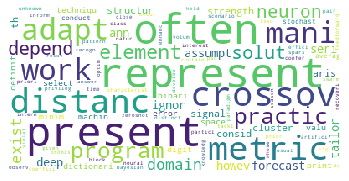

In [60]:
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt


##Creating a list of stop words and adding custom stopwords
stop_words = set(stopwords.words("english"))
##Creating a list of custom stopwords
new_words = ["using", "show", "result", "large", "also", "iv", "one", "ind","add","two", "new", "previously", "shown","vid","mod","method","propos","base","cond", "ad","use"]
stop_words = stop_words.union(new_words)

wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stop_words,
                          max_words=100,
                          max_font_size=50, 
                          random_state=42
                         ).generate(str(s))
print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [61]:
count_vect = CountVectorizer(token_pattern=r'\b[^\d\W]+\b') 
X = count_vect.fit_transform(s)
len(count_vect.get_feature_names())

2451

# 2)  Asociación

In [65]:
def Convert(string): 
    li = list(string.split(" ")) 
    return li 

matriz=s.as_matrix()
abstr_matr=[]
for i in range(0,len(s)):
    abstr_matr.append(np.array(Convert(matriz[i])))
dfabstr=pd.DataFrame(abstr_matr)
dfabstr.head(5)

C:\Users\Jairo Castrellón\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """


,0,1,2,3,4,5,6,7,8,9,...,214,215,216,217,218,219,220,221,222,223
0,exist,domain,adapt,da,work,assumpt,given,howev,assumpt,violat,...,None,None,None,None,None,None,None,None,None,None
1,season,distinct,characterist,often,observ,mani,practic,time,seri,artifici,...,None,None,None,None,None,None,None,None,None,None
2,consid,recov,signal,whose,structur,unknown,priori,signal,coeffici,occur,...,None,None,None,None,None,None,None,None,None,None
3,volum,contain,present,answer,program,paradigm,held,th,th,intern,...,None,None,None,None,None,None,None,None,None,None
4,binari,select,subset,element,item,highest,valu,keep,total,weight,...,None,None,None,None,None,None,None,None,None,None


## Algoritmo A priori

In [67]:
records = []
for i in range(0, len(s)):
    records.append([str(dfabstr.values[i,j]) for j in range(0, 20)])

In [68]:
from apyori import apriori

association_rules = apriori(records, min_support=0.2, min_confidence=0.7, min_length=2)
association_results = list(association_rules)
association_results

[]

In [69]:
for item in association_results:

    # first index of the inner list
    # Contains base item and add item
    pair = item[0] 
    items = [x for x in pair]
    print("Rule: " + items[0] + " -> " + items[1])

    #second index of the inner list
    print("Support: " + str(item[1]))

    #third index of the list located at 0th
    #of the third index of the inner list

    print("Confidence: " + str(item[2][0][2]))
    print("Lift: " + str(item[2][0][3]))
    print("=====================================")

## Algorítmo fpgrowth

In [70]:
from mlxtend.preprocessing import TransactionEncoder

te = TransactionEncoder()
te_ary = te.fit(abstr_matr).transform(abstr_matr)
df = pd.DataFrame(te_ary, columns=te.columns_)
df.tail(7)

,,a,abil,abl,absenc,absolut,abstract,abund,ac,academ,...,xray,year,yet,yield,z,zero,zeroshot,zidentif,zipf,zsl
1962,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1963,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1964,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1965,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1966,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1967,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1968,True,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [71]:
from mlxtend.frequent_patterns import fpgrowth

fpgrowth(df, min_support=0.2,max_len=4, use_colnames=True)

,support,itemsets
0,0.267141,(also)
1,0.211783,(work)
2,0.204165,(inform)
3,0.227019,(demonstr)
4,0.207212,(neural)
5,0.288471,(present)
6,0.228035,(new)
7,0.202133,(experi)
8,0.234637,(provid)
9,0.224987,(two)


# 3)  Clustering

### Dendograma

In [72]:
from sklearn.feature_extraction.text import TfidfVectorizer

tv = TfidfVectorizer(min_df=0., max_df=3., use_idf=True)
tv_matrix = tv.fit_transform(s)
tv_matrix = tv_matrix.toarray()

vocab = tv.get_feature_names()
pd.DataFrame(np.round(tv_matrix, 2), columns=vocab)

,abil,abl,absenc,absolut,abstract,abund,ac,academ,acceler,accept,...,wwwstatuclaedujunhuamaomrnnhtml,xray,year,yet,yield,zero,zeroshot,zidentif,zipf,zsl
0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.14,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1964,0.0,0.0,0.0,0.0,0.09,0.0,0.0,0.0,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0
1965,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0
1966,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0
1967,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0


In [73]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import jaccard_score

similarity_matrix = cosine_similarity(tv_matrix)
similarity_df = pd.DataFrame(similarity_matrix)
similarity_df

,0,1,2,3,4,5,6,7,8,9,...,1959,1960,1961,1962,1963,1964,1965,1966,1967,1968
0,1.000000,0.007771,0.029485,0.005457,0.019148,0.008382,0.005791,0.009839,0.028335,0.000000,...,0.007686,0.008602,0.045954,0.043680,0.013322,0.038185,0.047629,0.028950,0.053420,0.056974
1,0.007771,1.000000,0.038654,0.037850,0.013728,0.268956,0.018937,0.027921,0.009876,0.056220,...,0.015757,0.000000,0.007577,0.027176,0.009709,0.005968,0.042711,0.032523,0.047550,0.061861
2,0.029485,0.038654,1.000000,0.014926,0.031675,0.038193,0.036464,0.026574,0.129598,0.034483,...,0.022363,0.005076,0.012708,0.018727,0.065805,0.009995,0.084539,0.027298,0.056428,0.013006
3,0.005457,0.037850,0.014926,1.000000,0.041627,0.072848,0.022485,0.046150,0.004837,0.012677,...,0.010720,0.018991,0.000000,0.007309,0.000000,0.004067,0.000000,0.021504,0.000000,0.017183
4,0.019148,0.013728,0.031675,0.041627,1.000000,0.017480,0.000000,0.050033,0.015203,0.022872,...,0.010566,0.000000,0.004929,0.014149,0.021104,0.010297,0.031975,0.016926,0.000000,0.008857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1964,0.038185,0.005968,0.009995,0.004067,0.010297,0.014609,0.023264,0.062776,0.007658,0.003131,...,0.002739,0.005234,0.041795,0.027807,0.080994,1.000000,0.154840,0.007425,0.027498,0.011195
1965,0.047629,0.042711,0.084539,0.000000,0.031975,0.032656,0.077661,0.015645,0.029592,0.022081,...,0.067829,0.020787,0.044695,0.048623,0.264084,0.154840,1.000000,0.010974,0.115245,0.074467
1966,0.028950,0.032523,0.027298,0.021504,0.016926,0.031315,0.007743,0.042405,0.039711,0.009041,...,0.019366,0.007053,0.000000,0.039328,0.004849,0.007425,0.010974,1.000000,0.009015,0.021350
1967,0.053420,0.047550,0.056428,0.000000,0.000000,0.052541,0.048425,0.000000,0.040339,0.025432,...,0.020110,0.021314,0.008139,0.034667,0.017368,0.027498,0.115245,0.009015,1.000000,0.075360


In [74]:
from scipy.cluster.hierarchy import dendrogram, linkage

Z = linkage(similarity_matrix, 'complete')

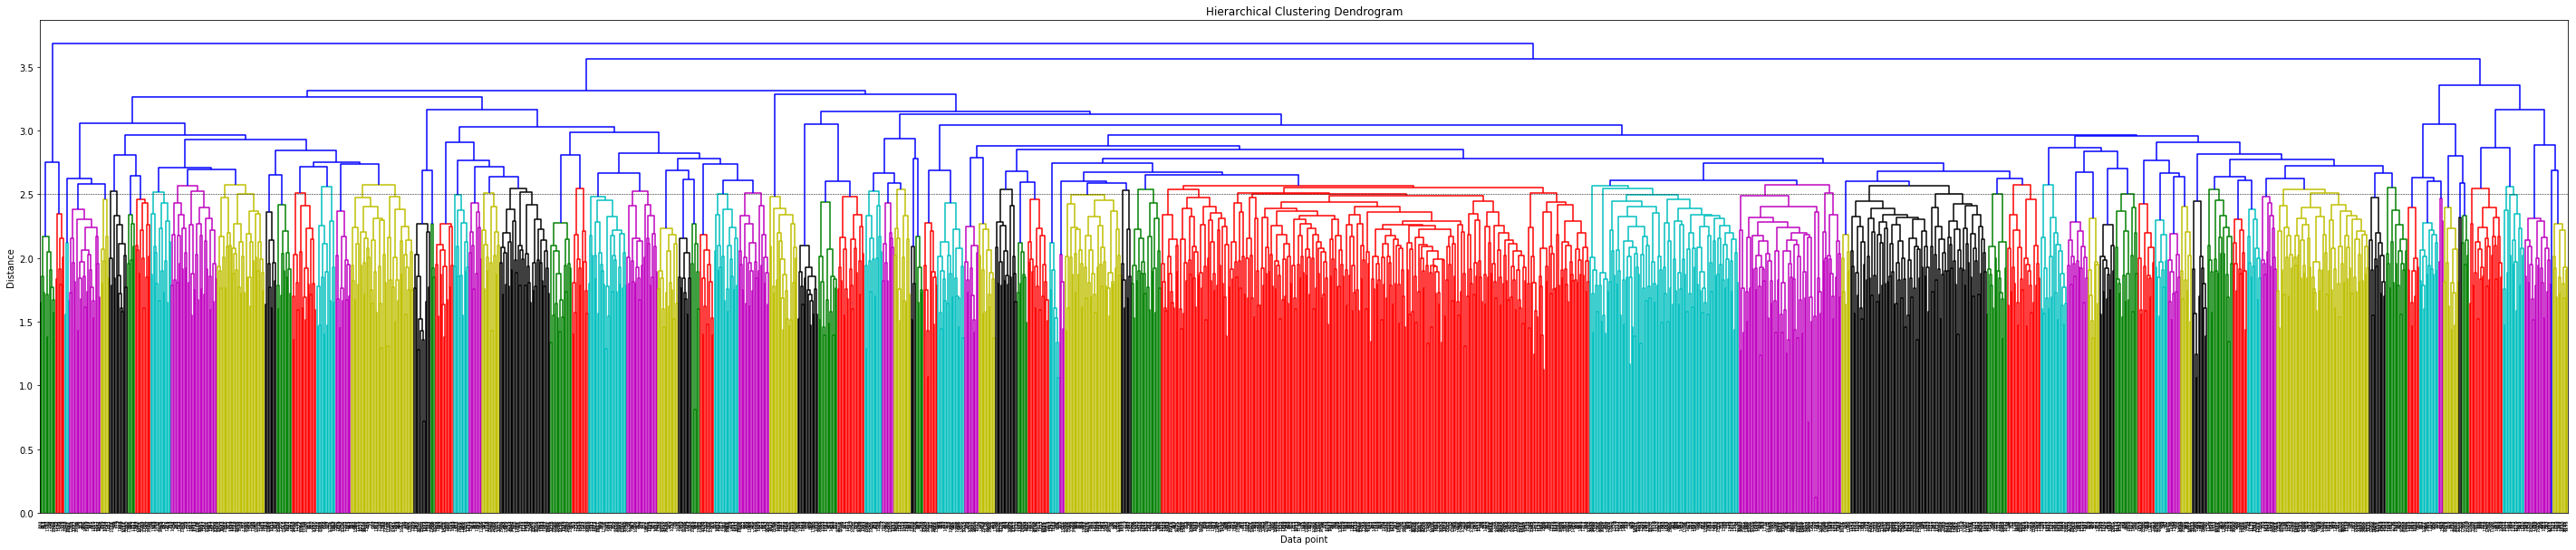

In [75]:

plt.figure(figsize=(50, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data point')
plt.ylabel('Distance')
dendrogram(Z)
plt.axhline(y=2.5, c='k', ls='--', lw=0.5)

In [76]:
from scipy.cluster.hierarchy import fcluster
max_dist = 2.3

cluster_labels = fcluster(Z, max_dist, criterion='distance')
cluster_labels = pd.DataFrame(cluster_labels, columns=['ClusterLabel'])
Ja=pd.concat([corpus_df, cluster_labels], axis=1)
Ja

,summary,ClusterLabel
0,"The existing methods of domain adaptation (DA) work under the assumption that\nthe task-relevant target-domain training data is given. However, such\nassumption can be violated, which is often ign...",276.0
1,Seasonality is a distinctive characteristic which is often observed in many\npractical time series. Artificial Neural Networks (ANNs) are a class of\npromising models for efficiently recognizing a...,48.0
2,We consider the problem of recovering block-sparse signals whose structures\nare unknown \emph{a priori}. Block-sparse signals with nonzero coefficients\noccurring in clusters arise naturally in m...,209.0
3,"This volume contains the papers presented at the sixth workshop on Answer Set\nProgramming and Other Computing Paradigms (ASPOCP 2013) held on August 25th,\n2013 in Istanbul, co-located with the 2...",103.0
4,Binary Knapsack Problem (BKP) is to select a subset of an element (item) set\nwith the highest value while keeping the total weight within the capacity of\nthe knapsack. This paper presents an int...,157.0
...,...,...
1995,Geometric crossover is a representation-independent definition of crossover\nbased on the distance of the search space interpreted as a metric space. It\ngeneralizes the traditional crossover for ...,NaN
1996,"For many machine learning algorithms such as $k$-Nearest Neighbor ($k$-NN)\nclassifiers and $ k $-means clustering, often their success heavily depends on\nthe metric used to calculate distances b...",NaN
1997,"When digitizing a print bilingual dictionary, whether via optical character\nrecognition or manual entry, it is inevitable that errors are introduced into\nthe electronic version that is created. ...",NaN
1998,"We consider a composite convex minimization problem associated with\nregularized empirical risk minimization, which often arises in machine\nlearning. We propose two new stochastic gradient method...",NaN


In [77]:
print(Ja['ClusterLabel'].value_counts())


166.0    75
191.0    48
170.0    27
160.0    25
175.0    23
         ..
93.0      2
7.0       1
273.0     1
274.0     1
289.0     1
Name: ClusterLabel, Length: 289, dtype: int64


## K-Means 

In [78]:
from sklearn.cluster import MiniBatchKMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [79]:
tfidf = TfidfVectorizer(
    min_df = 5,
    max_df = 0.95,
    max_features = 8000,
    stop_words = 'english'
)
tfidf.fit(s)
text = tfidf.transform(s)

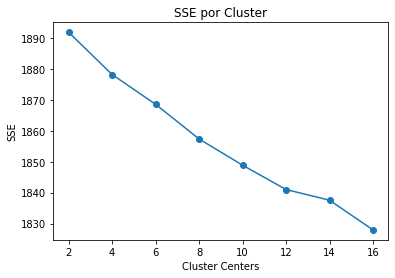

In [90]:
def find_optimal_clusters(data, max_k):
    iters = range(2, max_k+1, 2)
    
    sse = []
    for k in iters:
        sse.append(MiniBatchKMeans(n_clusters=k, init_size=1024, batch_size=2048, random_state=20).fit(data).inertia_)
        ##print('Fit {} clusters'.format(k))
        
    f, ax = plt.subplots(1, 1)
    ax.plot(iters, sse, marker='o')
    ax.set_xlabel('Cluster Centers')
    ax.set_xticks(iters)
    ax.set_xticklabels(iters)
    ax.set_ylabel('SSE')
    ax.set_title('SSE por Cluster')
    
find_optimal_clusters(text, 16)

In [92]:
clusters = MiniBatchKMeans(n_clusters=16, init_size=1024, batch_size=2048, random_state=20).fit_predict(text)

In [93]:
def get_top_keywords(data, clusters, labels, n_terms):
    df = pd.DataFrame(data.todense()).groupby(clusters).mean()
    
    for i,r in df.iterrows():
        print('\nCluster {}'.format(i))
        print(','.join([labels[t] for t in np.argsort(r)[-n_terms:]]))
            
get_top_keywords(text, clusters, tfidf.get_feature_names(), 10)


Cluster 0
estim,optim,approxim,factor,number,point,subspac,kmean,matrix,cluster

Cluster 1
reason,theori,search,solv,optim,fuzzi,rule,constraint,program,logic

Cluster 2
neural,experi,accuraci,represent,metric,onlin,evalu,recommend,user,predict

Cluster 3
express,video,appear,attribut,object,tracker,recognit,facial,track,face

Cluster 4
point,applic,scene,reconstruct,camera,depth,motion,pose,shape,estim

Cluster 5
latent,relat,classifi,embed,manifold,topic,space,label,classif,class

Cluster 6
minim,polici,regret,convex,function,bound,stochast,gradient,optim,converg

Cluster 7
transfer,discrimin,classifi,sourc,target,adapt,attack,gan,domain,adversari

Cluster 8
queri,process,nois,probabl,distribut,quantum,approxim,answer,sampl,question

Cluster 9
classif,detect,recognit,object,architectur,convolut,layer,neural,deep,cnn

Cluster 10
transcript,asr,phonem,neural,corpu,acoust,recognit,languag,speaker,speech

Cluster 11
interact,scenario,adapt,decis,navig,reinforc,knowledg,environ,agent,rob

# Clasificación

### Clasificación Naive Bayes 

In [177]:
from sklearn import metrics
import scikitplot as skplt
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split


L=np.asarray(Ja["ClusterLabel"])
labels = pd.DataFrame(clusters,columns=["labels"])
to_class = pd.concat([X1.reset_index(drop=True), labels], axis=1)
to_class.head(10)

,abil,abl,absenc,absolut,abstract,abund,ac,academ,acceler,accept,...,xray,year,yet,yield,zero,zeroshot,zidentif,zipf,zsl,labels
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,7
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,14
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,14
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,14
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,14
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5


In [178]:
data=np.array(to_class)
X = data[:,:2427]
Y = data[:,2427:]

In [179]:
y_c=[]
for i in Y:
    i=float(i)
    y_c.append(i)
Y=y_c

In [112]:
from sklearn.model_selection import cross_validate

NB = MultinomialNB()
cvNB= cross_validate(NB, X, Y, cv=30)

In [115]:
from sklearn.model_selection import cross_val_score

print(f"The accuracy of the model is: {np.mean(cvNB['test_score'])}")

The accuracy of the model is: 0.7138377311183043


In [183]:
predictions = cross_val_predict(NB, X, Y, cv=30)

In [185]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

print('Accuracy DT', metrics.accuracy_score(Y, predictions))

print('Metricas DT\n', metrics.classification_report(Y, predictions)) 

Accuracy DT 0.7145759268664297
Metricas DT
               precision    recall  f1-score   support

         0.0       0.78      0.55      0.65        65
         1.0       0.82      0.82      0.82       204
         2.0       0.71      0.58      0.64       283
         3.0       0.70      0.75      0.73        65
         4.0       0.75      0.49      0.59        55
         5.0       0.70      0.72      0.71       127
         6.0       0.68      0.90      0.77       140
         7.0       0.83      0.65      0.73        62
         8.0       0.76      0.49      0.59       107
         9.0       0.68      0.83      0.75       209
        10.0       0.88      0.70      0.78        40
        11.0       0.71      0.71      0.71        77
        12.0       0.78      0.68      0.72       105
        13.0       0.68      0.69      0.68       142
        14.0       0.67      0.79      0.73       213
        15.0       0.60      0.81      0.69        75

    accuracy                        

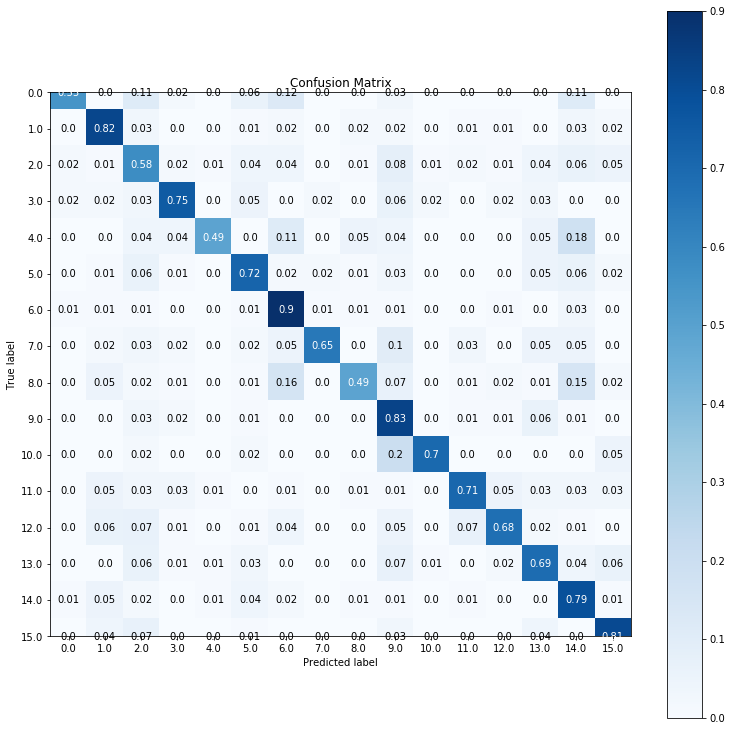

In [186]:
plot = skplt.metrics.plot_confusion_matrix(Y, predictions,normalize=True,title='Confusion Matrix',figsize = (13,13))

### Neural Networks

In [180]:
from sklearn.neural_network import MLPClassifier
MLP = MLPClassifier(solver='lbfgs', alpha=1e-4, hidden_layer_sizes=(500), random_state=1)
cvMLP= cross_validate(MLP, X, Y, cv=30)

In [181]:
print(f"The accuracy of the model is: {np.mean(cvMLP['test_score'])}")

The accuracy of the model is: 0.8293098170076159


In [187]:
predictions2 = cross_val_predict(MLP, X, Y, cv=30)

In [188]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

print('Accuracy DT', metrics.accuracy_score(Y, predictions2))

print('Metricas DT\n', metrics.classification_report(Y, predictions2)) 

Accuracy DT 0.8288471305231082
Metricas DT
               precision    recall  f1-score   support

         0.0       0.84      0.83      0.84        65
         1.0       0.87      0.87      0.87       204
         2.0       0.76      0.77      0.77       283
         3.0       0.84      0.83      0.84        65
         4.0       0.85      0.91      0.88        55
         5.0       0.81      0.85      0.83       127
         6.0       0.82      0.89      0.86       140
         7.0       0.80      0.79      0.80        62
         8.0       0.81      0.65      0.73       107
         9.0       0.87      0.89      0.88       209
        10.0       0.86      0.93      0.89        40
        11.0       0.73      0.77      0.75        77
        12.0       0.77      0.70      0.74       105
        13.0       0.90      0.93      0.91       142
        14.0       0.87      0.79      0.83       213
        15.0       0.84      0.91      0.87        75

    accuracy                        

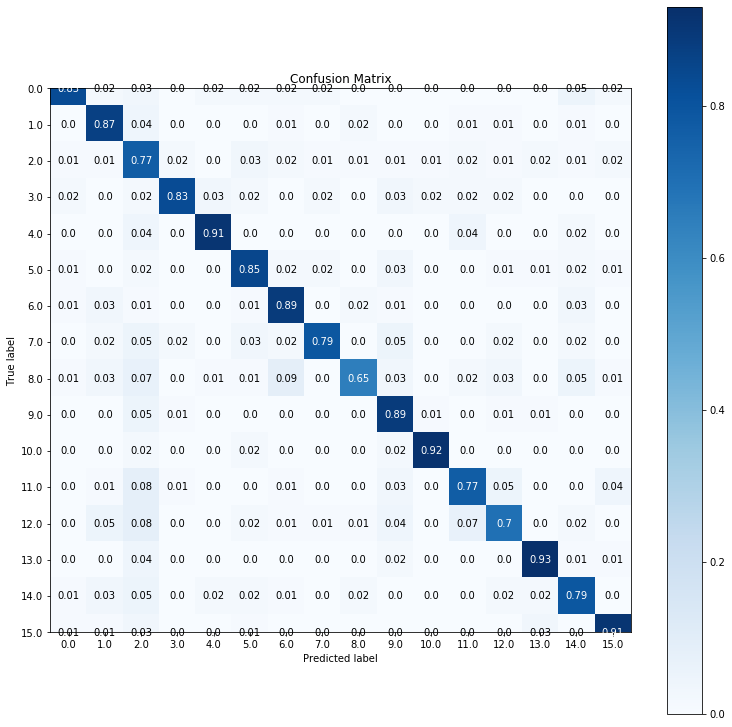

In [189]:
plot = skplt.metrics.plot_confusion_matrix(Y, predictions2,normalize=True,title='Confusion Matrix',figsize = (13,13))

## KNN

In [143]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors=3)
cvKNN= cross_validate(KNN, X, Y, cv=30)

In [144]:
print(f"The accuracy of the model is: {np.mean(cvKNN['test_score'])}")

The accuracy of the model is: 0.36761893927388056


## Random Forest

In [195]:
L=np.asarray(Ja["ClusterLabel"])
labels = pd.DataFrame(clusters,columns=["labels"])
to_class2 = pd.concat([df.reset_index(drop=True), labels], axis=1)
to_class2.head(10)

,,a,abil,abl,absenc,absolut,abstract,abund,ac,academ,...,year,yet,yield,z,zero,zeroshot,zidentif,zipf,zsl,labels
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,7
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,1
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,14
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,1
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,14
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,14
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,1
7,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,1
8,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,14
9,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,5


In [196]:
data=np.array(to_class2)
X1 = data[:,:2452]
Y1 = data[:,2452:]

In [197]:
y_c1=[]
for i in Y1:
    i=float(i)
    y_c1.append(i)
Y1=y_c1

In [200]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(max_depth=1000, random_state=1)
cvRF= cross_validate(RF, X1, Y1, cv=20)

C:\Users\Jairo Castrellón\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Jairo Castrellón\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Jairo Castrellón\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Jairo Castrellón\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Jairo Castrellón\Anacon

In [201]:
print(f"The accuracy of the model is: {np.mean(cvRF['test_score'])}")

The accuracy of the model is: 0.4427391905594026
